In [1]:
# RUN THIS CELL TO IMPORT THE NECESSARY LIBRARIES
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import os
import us
import glob
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# The effects of 'Stay at Home Orders' on COVID-19 transmission
Now that you have been more acquainted with Python, and have succesfully completed your first data-immersed math exercise, let's do something a bit more informative. Here we will explore how the number of recorded COVID-19 cases fluctuate as a result of the 'stay at home orders' effective in CA.

## 1. Let's load California Data

In [7]:
# RUN THIS CELL TO LOAD DATA!
new_data= pd.read_csv('../../data/CA_data.csv')
new_data = new_data.drop(columns=['Unnamed: 0'])
new_data.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective,stay_at_home_effective_bool
0,2020-03-07,Santa Clara,California,6085,32,0.0,no,no,37.231795,-121.695141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19,2020-03-19,0
1,2020-03-08,Santa Clara,California,6085,37,0.0,no,no,37.231795,-121.695141,...,50.36,49.10,48.680000,44.200000,44.78,44.57,42.566667,2020-03-19,2020-03-19,0
2,2020-03-09,Santa Clara,California,6085,43,1.0,no,no,37.231795,-121.695141,...,50.36,49.82,48.440000,43.100000,45.08,45.32,42.373333,2020-03-19,2020-03-19,0
3,2020-03-10,Alameda,California,6001,25,0.0,no,no,37.646960,-121.888767,...,42.46,43.83,42.753333,42.233333,42.96,44.05,42.340000,2020-03-19,2020-03-19,0
4,2020-03-10,Santa Clara,California,6085,45,1.0,no,no,37.231795,-121.695141,...,49.64,50.00,48.080000,44.800000,45.08,45.48,42.500000,2020-03-19,2020-03-19,0


Note the many components in this dataset. As opposed to the curated data we have many more columns (228 to be exact) which contain a lot of information.

## 2. Let's Explore Los Angeles
We will now study a very specific county: Los Angeles. In particular, we want to see whether or not the effects of 'stay at home orders' affect the number of cases. If not, why could that be?

In [8]:
# RUN THIS CELL (our county of interest)
myCounty = 'Los Angeles' 

In [9]:
# RUN THIS CELL (this simplifies the data to your selected county)
CA_county = new_data.groupby('county')
yourCounty = CA_county.get_group(myCounty)
yourCounty['Days since 25th Case'] = np.arange(len(yourCounty))

In [24]:
# RUN THIS CELL (getting dates when stay at home was effective)
yes = yourCounty.index[yourCounty['stay_at_home_effective'] == 'yes']
no = yourCounty.index[yourCounty['stay_at_home_effective'] == 'no']

## 3. What dates should we consider?

Well, we can make the initial assumption that cases should automatically go down after the stay at home order is effective. This can lead to less contact between individuals, therefore decreasing the chances of transmission, right?

**However**
- What if the people in the county do not follow orders?
- What potential causes in the county could lead to the changes in numbers?
- Is there a particular ocurrence that may lead to the increase in numbers?

Below we have 4 vertical lines plotted:
1. The first one marks the start of the stay at home order.
2. The 2nd-4th mark 'Mysterious dates' that occured at specific points in the data in which the recorded cases of COVID-19 increased/decreased.

In [64]:
xval_start = yourCounty.loc[yes[0]]['Days since 25th Case']
xval_date1 = yourCounty.loc[yourCounty['Days since 25th Case'] == 115]['Days since 25th Case'].values[0]
xval_date2 = yourCounty.loc[yourCounty['Days since 25th Case'] == 180]['Days since 25th Case'].values[0]
xval_date3 = yourCounty.loc[yourCounty['Days since 25th Case'] == 235]['Days since 25th Case'].values[0]

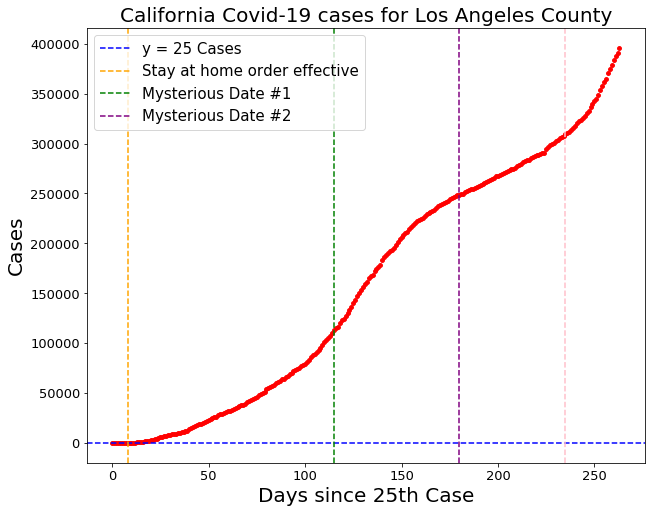

In [65]:
f, a = plt.subplots(figsize=(10,8))
yourCounty.plot(x='Days since 25th Case', y = 'cases',
               kind='scatter', legend='county', ax = a,
               s = 15.0, color='red')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel(xlabel='Days since 25th Case', fontsize=20)
plt.ylabel(ylabel='Cases', fontsize=20)
title = 'California' + ' Covid-19 cases for ' + myCounty + ' County'
plt.title(title, fontsize=20)
plt.axhline(y=25, color='blue', linestyle='--')
plt.axvline(x=xval_start, color='orange', linestyle='--')
plt.axvline(x=xval_date1, color = 'green', linestyle='--')
plt.axvline(x=xval_date2, color= 'purple', linestyle='--')
plt.axvline(x=xval_date3, color='pink', linestyle = '--')
plt.legend(['y = 25 Cases', 'Stay at home order effective', 
            'Mysterious Date #1', 'Mysterious Date #2'],
          prop={'size': 15})

## 4. What can these vertical lines tell us about this data?
We do not expect you to give us the exact date of these fluctuations in cases. 
- Notice how on the first green line there is a steady increase in the number of cases.

### Let's answer some questions:
1. Why do you think the curve flattens once we get to the purplue line
2. What could have possibly led to an increase on the number of cases? 
3. What about the rapid increase in cases in the pink line?

**Your answers here:**

1.

2.

3.

## 5. Let's find out the actual dates, shall we?

The days on which the vertical lines were drawn are as follows:
1. Green line: Day #115 (after the 25th case was recorded in this county)
2. Purple line: Day #180 (after the 25th case was recorded in this county)
3. Pink line: Day #235 (after the 25th case was recorded in this county)

Now, to see the year date in which these dramatic changes on the number of cases ocurred you will insert the day number next to the variable `dayNumber` as an integer in the cell below.

In [67]:
# place your number here!
dayNumber = 235 # YOUR CODE HERE

In [68]:
date = yourCounty[yourCounty['Days since 25th Case'] == dayNumber]['date']
date

10629    2020-11-01
Name: date, dtype: object

### Some more questions
1. What are the dates that you extracted above?
2. Does this verify your assumptions in question 4?
3. What is your conclusion from this analysis?

**Your answers here**

1.

2.

3.

## Congratulations! You've completed your second and final python data analysis for COVID-19 data!!